In [1]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
import numpy as np
import input_data
import matplotlib.pyplot as plt
%matplotlib inline
tf.disable_control_flow_v2()


In [2]:
mnist = input_data.read_data_sets('mnist/', one_hot=True)
X = mnist.train.images

Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.


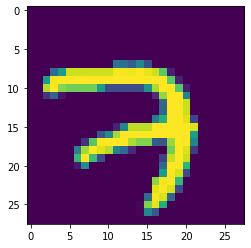

In [3]:
plt.imshow(X[0].reshape(28,28))

In [4]:
inputs_neurons = 784
hidden_neurons1 = 128
hidden_neurons2 = 64

hidden_neurons3 = hidden_neurons1
output_neurons = inputs_neurons

In [5]:
tf.reset_default_graph()
tf.compat.v1.disable_eager_execution()

In [6]:
X_placeholder = tf.placeholder(tf.float32,[None, inputs_neurons])

In [7]:
initializer = tf.variance_scaling_initializer()

In [8]:
weights = {'hidden_encoder1': tf.Variable(initializer([inputs_neurons, hidden_neurons1])),
           'hidden_encoder2': tf.Variable(initializer([hidden_neurons1, hidden_neurons2])),
           'hidden_decoder3': tf.Variable(initializer([hidden_neurons2, hidden_neurons3])),
           'output_decoder': tf.Variable(initializer([hidden_neurons3, output_neurons])),
}

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
bias = {'hidden_encoder1': tf.Variable(initializer([hidden_neurons1])),
        'hidden_encoder2': tf.Variable(initializer([hidden_neurons2])),
        'hidden_decoder3': tf.Variable(initializer([hidden_neurons3])),
        'output_decoder': tf.Variable(initializer([output_neurons])),
}

In [10]:
hidden_layer1 = tf.nn.relu(tf.add(tf.matmul(X_placeholder, weights['hidden_encoder1']), bias['hidden_encoder1']))
hidden_layer2 = tf.nn.relu(tf.add(tf.matmul(hidden_layer1, weights['hidden_encoder2']), bias['hidden_encoder2']))
hidden_layer3 = tf.nn.relu(tf.add(tf.matmul(hidden_layer2, weights['hidden_decoder3']), bias['hidden_decoder3']))
output_layer = tf.nn.relu(tf.add(tf.matmul(hidden_layer3, weights['output_decoder']), bias['output_decoder']))

In [11]:
error = tf.losses.mean_squared_error(X_placeholder, output_layer)
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)
batch_size = 128

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epochs in range(50):
        num_batches = mnist.train.num_examples // batch_size
        for i in range(num_batches):
            X_batch, _ = mnist.train.next_batch(batch_size)
            cost, _ = sess.run([error, train], feed_dict = {X_placeholder: X_batch})
        print('epochs :' + str(epochs + 1) + ' error :'+ str(cost))
    encoded_images = sess.run(hidden_layer2, feed_dict={X_placeholder: X})
    decoded_images = sess.run(output_layer, feed_dict={X_placeholder: X})

epochs :1 error :0.016419917
epochs :2 error :0.013895465
epochs :3 error :0.012893879
epochs :4 error :0.012514538
epochs :5 error :0.011943532
epochs :6 error :0.011019616
epochs :7 error :0.011098648
epochs :8 error :0.011242227
epochs :9 error :0.010602224
epochs :10 error :0.01078679
epochs :11 error :0.011146346
epochs :12 error :0.01117717
epochs :13 error :0.010338842
epochs :14 error :0.01025012
epochs :15 error :0.010883022
epochs :16 error :0.010308433
epochs :17 error :0.009759509
epochs :18 error :0.010837473
epochs :19 error :0.009847065
epochs :20 error :0.010911683
epochs :21 error :0.010604591
epochs :22 error :0.010527774
epochs :23 error :0.0101477895
epochs :24 error :0.0097712055
epochs :25 error :0.010245019
epochs :26 error :0.009886473
epochs :27 error :0.010491663
epochs :28 error :0.00899332
epochs :29 error :0.009539288
epochs :30 error :0.010551715
epochs :31 error :0.01095934
epochs :32 error :0.010064606
epochs :33 error :0.009260836
epochs :34 error :0.01

In [13]:
encoded_images.shape

(55000, 64)

In [14]:
decoded_images.shape

(55000, 784)

In [15]:
num_images = 5
test_image = np.random.randint(X.shape[0], size=num_images)

In [16]:
test_image

array([48344, 16136, 25703, 35958, 48768])

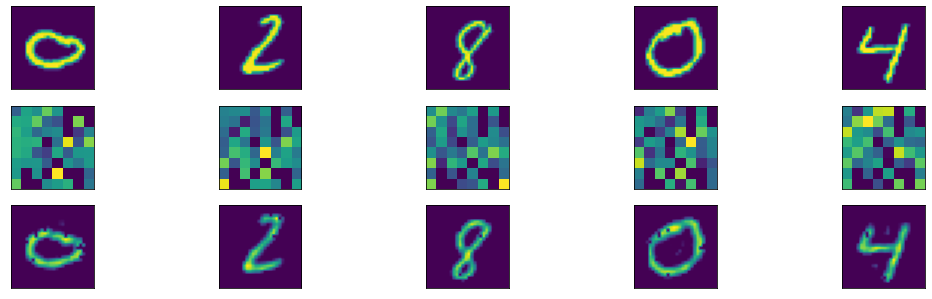

In [20]:
plt.figure(figsize=(18,18))
for i, ind_image in enumerate(test_image):
    #print(i)
    #print(ind_image)
    eixo = plt.subplot(10, 5, i+ 1)
    plt.imshow(X[ind_image].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())

    eixo = plt.subplot(10, 5, i+ 1 + num_images)
    plt.imshow(encoded_images[ind_image].reshape(8, 8))
    plt.xticks(())
    plt.yticks(())

    eixo = plt.subplot(10, 5, i+ 1 + num_images * 2)
    plt.imshow(decoded_images[ind_image].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())